<a href="https://colab.research.google.com/github/fernandovieira1/ML-e-DS-com-Python-de-A-a-Z/blob/master/Parte2_RL_simples_plano_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install plotly --upgrade
# !pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
base_plano_saude = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/IA Expert/ML-e-DS-com-Python-de-A-a-Z/Bases de dados/plano_saude.csv')

In [4]:
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [5]:
x = base_plano_saude.iloc[:, 0].values

In [6]:
y = base_plano_saude.iloc[:, 1].values

In [7]:
np.corrcoef(x, y)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [8]:
x.shape

(10,)

In [9]:
x = x.reshape(-1, 1)

In [10]:
x.shape

(10, 1)

In [11]:
# lm_s: regressão simples
# lm_m: regressão múltipla
# lm_p: regressão polinomial
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [12]:
lm.intercept_ # intercepto

-558.9490909090912

In [13]:
lm.coef_ # coeficiente

array([61.86787879])

In [14]:
lm.score(x, y) # R2

0.8666112727879174

In [15]:
previsoes = lm.predict(x)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

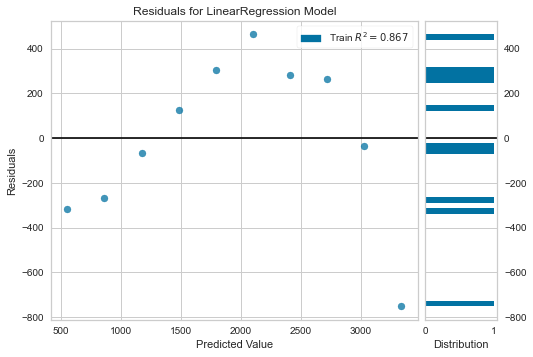

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
from yellowbrick.regressor import ResidualsPlot

visualizador = ResidualsPlot(lm)
visualizador.fit(x, y)

visualizador.poof()

In [17]:
x = x.ravel() # voltar para vetor
x

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [18]:
grafico = px.scatter(x=x, y=y)
grafico.add_scatter(x=x, y=previsoes, name='Regressão')
grafico.show()

/Users/fernandovieira/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

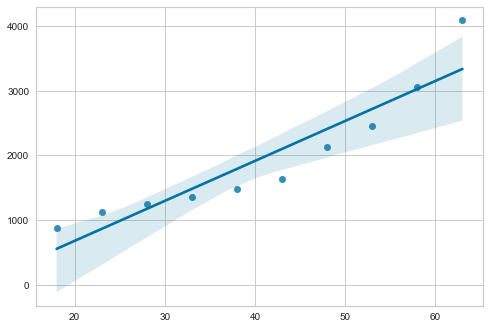

In [19]:
grafico = sns.regplot(x, y)
#grafico.add_scatter(x=x, y=previsoes, name='Regressão' )
grafico


In [20]:
lm.predict([[40]]) # Prevendo o custo no caso de uma pessoa de 40 anos

array([1915.76606061])